# Limpieza y preparación de datos

## 2.1 Tratamiento de los datos que faltan

Valor centinela (sentinel value) =  valor ausente (o nulo)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Flotantes 

In [2]:
float_data = pd.Series(
    [100.8, -30.5, 67, 101.9, -7.2, 
     -400, np.nan, 0, np.nan]
    )

In [3]:
float_data

0    100.8
1    -30.5
2     67.0
3    101.9
4     -7.2
5   -400.0
6      NaN
7      0.0
8      NaN
dtype: float64

In [4]:
float_data.isna() # devuelve serie booleana, True si tiene nulos 

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8     True
dtype: bool

### String - cadenas 

In [5]:
string_data = pd.Series(['abcd', np.nan, None, 'dfeg', None, 'pyhton', None])

string_data

0      abcd
1       NaN
2      None
3      dfeg
4      None
5    pyhton
6      None
dtype: object

In [6]:
string_data.isna()

0    False
1     True
2     True
3    False
4     True
5    False
6     True
dtype: bool

### Flotantes

In [7]:
float_data = pd.Series([None, 1, 2, None, 3, np.nan], dtype='float64')
float_data

0    NaN
1    1.0
2    2.0
3    NaN
4    3.0
5    NaN
dtype: float64

In [8]:
float_data.isna()

0     True
1    False
2    False
3     True
4    False
5     True
dtype: bool

In [9]:
float_data.dropna() #Elimina nulos 

1    1.0
2    2.0
4    3.0
dtype: float64

### Filtrar los datos que faltan

In [10]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7, 2.7, np.nan, 9.1, 800, np.nan])
data


0      1.0
1      NaN
2      3.5
3      NaN
4      7.0
5      2.7
6      NaN
7      9.1
8    800.0
9      NaN
dtype: float64

In [11]:
data[data.notna()]

0      1.0
2      3.5
4      7.0
5      2.7
7      9.1
8    800.0
dtype: float64

In [12]:
data.dropna()

0      1.0
2      3.5
4      7.0
5      2.7
7      9.1
8    800.0
dtype: float64

==============================================================================

In [13]:
data = pd.DataFrame([[1., 700, 6.5, 100, 3.], [1., np.nan, np.nan, 300, 900],
             [300, np.nan, 400, np.nan, np.nan],
             [300, 6.5, 3., 500., 900], 
             [np.nan, 100, 400, 600, 800],
             [np.nan, np.nan, np.nan, np.nan, np.nan]])

data

,0,1,2,3,4
0,1.0,700.0,6.5,100.0,3.0
1,1.0,NaN,NaN,300.0,900.0
2,300.0,NaN,400.0,NaN,NaN
3,300.0,6.5,3.0,500.0,900.0
4,NaN,100.0,400.0,600.0,800.0
5,NaN,NaN,NaN,NaN,NaN


`dropna()` por defecto elimina cualquier FILA que contenga un valor perdido:

In [14]:
data.dropna()

,0,1,2,3,4
0,1.0,700.0,6.5,100.0,3.0
3,300.0,6.5,3.0,500.0,900.0


Si se pasa `how="all"`, sólo se eliminarán las filas que sean todas NA:

In [15]:
data.dropna(how="all")

,0,1,2,3,4
0,1.0,700.0,6.5,100.0,3.0
1,1.0,NaN,NaN,300.0,900.0
2,300.0,NaN,400.0,NaN,NaN
3,300.0,6.5,3.0,500.0,900.0
4,NaN,100.0,400.0,600.0,800.0


In [16]:
data[5] = np.nan #Agrego nueva columna, la 5 con todos sus valores NaN 
data

,0,1,2,3,4,5
0,1.0,700.0,6.5,100.0,3.0,NaN
1,1.0,NaN,NaN,300.0,900.0,NaN
2,300.0,NaN,400.0,NaN,NaN,NaN
3,300.0,6.5,3.0,500.0,900.0,NaN
4,NaN,100.0,400.0,600.0,800.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.dropna(axis="columns", how="all") 
#Uso con dropna (axis= 'columns') ---> para eliminar datos de una columna 
#Uso con dropna (axis= 'rows') ---> para eliminar datos de una fila
#Uso how='all' ---> Para eliminar todos los datos siempre que sean nulos 

,0,1,2,3,4
0,1.0,700.0,6.5,100.0,3.0
1,1.0,NaN,NaN,300.0,900.0
2,300.0,NaN,400.0,NaN,NaN
3,300.0,6.5,3.0,500.0,900.0
4,NaN,100.0,400.0,600.0,800.0
5,NaN,NaN,NaN,NaN,NaN


=======================================================================

In [18]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
# Crea dataframe con 6 columnas y 3 filas 

In [19]:
df

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,-0.393002,1.263987
2,-1.254941,-0.661069,-0.499432
3,0.170399,1.063728,0.253868
4,0.300556,-1.624485,-0.388350
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


In [20]:
df.iloc[1:4, 1] = np.nan # Asigna np.nan a las filas 1 hasta la 3 en la columna 1
df.iloc[2:5, 2] = np.nan #Asigna np.nan a las filas 2 hasta la 4 en la columna 2

In [21]:
df

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,NaN,1.263987
2,-1.254941,NaN,NaN
3,0.170399,NaN,NaN
4,0.300556,-1.624485,NaN
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


In [22]:
df.dropna() #Elimina filas con nulos 

,0,1,2
0,-0.788406,-0.801293,0.710244
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


Con `thresh`, especifica el número mínimo de valores no nulos que deben estar presentes en una FILA o COLUMNA para que no sea eliminada.

In [23]:
df.dropna(thresh=2) #una fila debe tener al menos 2 valores no nulos para que no sea eliminada

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,NaN,1.263987
4,0.300556,-1.624485,NaN
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


In [24]:
df

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,NaN,1.263987
2,-1.254941,NaN,NaN
3,0.170399,NaN,NaN
4,0.300556,-1.624485,NaN
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


In [25]:
df.dropna(thresh=5, axis=1)
#Elimina las columnas que no tienen al menos 5 valores NO NULOS .

,0
0,-0.788406
1,0.520872
2,-1.254941
3,0.170399
4,0.300556
5,0.142821
6,-0.886762


### Rellenar los datos que faltan

In [26]:
df

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,NaN,1.263987
2,-1.254941,NaN,NaN
3,0.170399,NaN,NaN
4,0.300556,-1.624485,NaN
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


In [27]:
df.fillna(0) # Rellena los NaN con cero 

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,0.000000,1.263987
2,-1.254941,0.000000,0.000000
3,0.170399,0.000000,0.000000
4,0.300556,-1.624485,0.000000
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


Llamando a `fillna()` con un diccionario, puede utilizar un valor de relleno diferente para cada columna:

In [28]:
df.fillna({1: 400, 2: 500})

,0,1,2
0,-0.788406,-0.801293,0.710244
1,0.520872,400.000000,1.263987
2,-1.254941,400.000000,500.000000
3,0.170399,400.000000,500.000000
4,0.300556,-1.624485,500.000000
5,0.142821,-1.690655,-1.067990
6,-0.886762,0.596266,2.311699


==========================================================================================

Los mismos métodos de interpolación disponibles para la reindexación pueden utilizarse con `fillna()`:

In [29]:
df = pd.DataFrame(np.random.standard_normal((7, 4)))

In [30]:
df.iloc[2:6, 0] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2,3
0,0.223802,0.071034,0.660636,-0.362369
1,-0.554555,-1.399234,0.135322,-0.172708
2,NaN,-0.962978,-0.024321,0.817519
3,NaN,-1.585648,1.220362,-0.179034
4,NaN,1.342085,NaN,0.997838
5,NaN,-0.612505,NaN,-0.282921
6,-0.228292,-1.586034,NaN,-0.827239


In [31]:
df.fillna(method="ffill") # Rellena nuloscon el primer valor de la columna antes del nulo

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1388\3422287613.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill") # Rellena nuloscon el primer valor de la columna antes del nulo


,0,1,2,3
0,0.223802,0.071034,0.660636,-0.362369
1,-0.554555,-1.399234,0.135322,-0.172708
2,-0.554555,-0.962978,-0.024321,0.817519
3,-0.554555,-1.585648,1.220362,-0.179034
4,-0.554555,1.342085,1.220362,0.997838
5,-0.554555,-0.612505,1.220362,-0.282921
6,-0.228292,-1.586034,1.220362,-0.827239


In [32]:
df

,0,1,2,3
0,0.223802,0.071034,0.660636,-0.362369
1,-0.554555,-1.399234,0.135322,-0.172708
2,NaN,-0.962978,-0.024321,0.817519
3,NaN,-1.585648,1.220362,-0.179034
4,NaN,1.342085,NaN,0.997838
5,NaN,-0.612505,NaN,-0.282921
6,-0.228292,-1.586034,NaN,-0.827239


In [33]:
df.fillna(method="ffill", limit=2) # Solo rellena 2 nulos por cada columna 

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1388\3242824178.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", limit=2) # Solo rellena 2 nulos por cada columna


,0,1,2,3
0,0.223802,0.071034,0.660636,-0.362369
1,-0.554555,-1.399234,0.135322,-0.172708
2,-0.554555,-0.962978,-0.024321,0.817519
3,-0.554555,-1.585648,1.220362,-0.179034
4,NaN,1.342085,1.220362,0.997838
5,NaN,-0.612505,1.220362,-0.282921
6,-0.228292,-1.586034,NaN,-0.827239


==========================================================================================

`fillna()` = imputación simple de datos utilizando la mediana o la media estadística

In [34]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7, np.nan, np.nan])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
5    NaN
6    NaN
dtype: float64

In [35]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
5    3.833333
6    3.833333
dtype: float64

__________________________

## Transformación de datos

### Remover duplicados

In [36]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2":[1, 1, 2, 3, 3, 4, 4]})

In [37]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [38]:
data.duplicated() #Devuelve serie booleana 

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [39]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [40]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [41]:
# Añadimos una tercera columna
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


Elimina las filas duplicadas basándose en los valores de la columna "k1". La primera aparición de cada valor único en "k1" se conserva, y las filas subsecuentes con el mismo valor en "k1" se eliminan.

In [42]:
data.drop_duplicates(subset=["k1"]) #Eliminó duplicados y dejó por defecto la 1ra fila de cada duplicado

,k1,k2,v1
0,one,1,0
1,two,1,1


In [43]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [44]:
data.drop_duplicates(["k1", "k2"], keep="last") #Elimina duplicados de  k1 y k2 y deja el último

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


-------------------------------

### Transformación de datos mediante una `Function` o `Mapping`

In [45]:
data = pd.DataFrame({"food": ["bacon", "pulled pork",
                              "bacon","pastrami", "corned beef",
                              "bacon", "pastrami", "honey ham",
                              "nova lox", "bacon", "bacon"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6, 20, 30]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0
9,bacon,20.0


Añadimos una columna 

In [46]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon",
}

El método `map` MAPEO los valores de la columna food y los reemplaza dependiendo de los valores del diccionario meat_to_animal, y crea una nueva columna 'animal' con lo datos ya mapeados. 

In [47]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon
9,bacon,20.0,pig


In [48]:
def get_animal(x):
    return meat_to_animal[x]

data["animal"] = data["food"].map(get_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon
9,bacon,20.0,pig


--------------------

### Sustitución de valores

In [49]:
data = pd.Series([1., -999., 2., -999., -1000., 3., 100, np.nan])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
6     100.0
7       NaN
dtype: float64

In [50]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
6     100.0
7       NaN
dtype: float64

In [51]:
data.replace([-999, -1000], np.nan)

0      1.0
1      NaN
2      2.0
3      NaN
4      NaN
5      3.0
6    100.0
7      NaN
dtype: float64

In [52]:
data.replace([-999, -1000], [np.nan, 0])

0      1.0
1      NaN
2      2.0
3      NaN
4      0.0
5      3.0
6    100.0
7      NaN
dtype: float64

In [53]:
data.replace({-999: np.nan, -1000: 0})

0      1.0
1      NaN
2      2.0
3      NaN
4      0.0
5      3.0
6    100.0
7      NaN
dtype: float64

------------------------

### Renombrar índices de ejes

In [54]:
data = pd.DataFrame(np.arange(20).reshape((4, 5)),
                    index=["Ohio", "Colorado", "New York", "Ecuador"],
                    columns=["one", "two", "three", "four", "ten"])
                    
data

,one,two,three,four,ten
Ohio,0,1,2,3,4
Colorado,5,6,7,8,9
New York,10,11,12,13,14
Ecuador,15,16,17,18,19


In [55]:
def transform(x):
    return x[:4].upper()

data.index.map(transform)
#Index(['OHIO', 'COLO', 'NEW '], dtype='object')

Index(['OHIO', 'COLO', 'NEW ', 'ECUA'], dtype='object')

In [56]:
data

,one,two,three,four,ten
Ohio,0,1,2,3,4
Colorado,5,6,7,8,9
New York,10,11,12,13,14
Ecuador,15,16,17,18,19


In [57]:
data.index = data.index.map(transform)
data

,one,two,three,four,ten
OHIO,0,1,2,3,4
COLO,5,6,7,8,9
NEW,10,11,12,13,14
ECUA,15,16,17,18,19


In [58]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR,TEN
Ohio,0,1,2,3,4
Colo,5,6,7,8,9
New,10,11,12,13,14
Ecua,15,16,17,18,19


In [59]:
data.rename(index={"OHIO": "Madrid"},
            columns={"three": "tres"})
            

,one,two,tres,four,ten
Madrid,0,1,2,3,4
COLO,5,6,7,8,9
NEW,10,11,12,13,14
ECUA,15,16,17,18,19


------------------------------------

### Discretización y `binning`

Convertir datos continuos en discretos. 

Técnicas de PREPROCESAMIENTO DE DATOS = La discretización y el binning

> Discretización ---> Convierte datos continuos en datos categóricos dividiendo el rango de valores continuos en intervalos (bins).

> Binning ---> agrupa los datos en intervalos, o `"bins"`.  

In [60]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 80, 100, 101, 1, 4, 77, 44, 88, 87, 92, 104]

In [61]:
bins = [10, 20, 30, 40, 50 ,60, 70, 80, 90, 100, 110]

In [62]:
age_categories = pd.cut(ages, bins)

In [63]:
age_categories

[(10, 20], (20, 30], (20, 30], (20, 30], (20, 30], ..., (40, 50], (80, 90], (80, 90], (90, 100], (100, 110]]
Length: 23
Categories (10, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] ... (70, 80] < (80, 90] < (90, 100] < (100, 110]]

El objeto que pandas devuelve es un objeto `Categorical` especial. La salida que se ve describe los bins calculados por `pandas.cut`. Cada bin se identifica por un tipo de valor de intervalo especial (único en pandas) que contiene el límite inferior y superior de cada bin:

In [64]:
age_categories.codes

array([ 0,  1,  1,  1,  1,  1,  2,  2,  5,  3,  3,  2,  6,  8,  9, -1, -1,
        6,  3,  7,  7,  8,  9], dtype=int8)

In [65]:
age_categories.categories

IntervalIndex([  (10, 20],   (20, 30],   (30, 40],   (40, 50],   (50, 60],
                 (60, 70],   (70, 80],   (80, 90],  (90, 100], (100, 110]],
              dtype='interval[int64, right]')

In [66]:
age_categories.categories[0]

Interval(10, 20, closed='right')

In [67]:
pd.value_counts(age_categories)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1388\3010498523.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(age_categories)


(20, 30]      5
(30, 40]      3
(40, 50]      3
(70, 80]      2
(80, 90]      2
(90, 100]     2
(100, 110]    2
(10, 20]      1
(60, 70]      1
(50, 60]      0
Name: count, dtype: int64

In [68]:
pd.cut(ages, bins, right=False)

[[20, 30), [20, 30), [20, 30), [20, 30), [20, 30), ..., [40, 50), [80, 90), [80, 90), [90, 100), [100, 110)]
Length: 23
Categories (10, interval[int64, left]): [[10, 20) < [20, 30) < [30, 40) < [40, 50) ... [70, 80) < [80, 90) < [90, 100) < [100, 110)]

In [69]:
data = np.random.uniform(size=20)
data

array([0.52242598, 0.21708636, 0.84755837, 0.60350056, 0.46480426,
       0.12399537, 0.74256674, 0.67722974, 0.94175329, 0.57416017,
       0.67888022, 0.11468175, 0.51741308, 0.2806265 , 0.06094109,
       0.83968306, 0.28704859, 0.80655646, 0.44446941, 0.32285763])

In [70]:
pd.cut(data, 4, precision=2)

[(0.5, 0.72], (0.06, 0.28], (0.72, 0.94], (0.5, 0.72], (0.28, 0.5], ..., (0.72, 0.94], (0.28, 0.5], (0.72, 0.94], (0.28, 0.5], (0.28, 0.5]]
Length: 20
Categories (4, interval[float64, right]): [(0.06, 0.28] < (0.28, 0.5] < (0.5, 0.72] < (0.72, 0.94]]

============================================================================

In [71]:
data = np.random.standard_normal(1000)
data

array([-6.04694194e-01,  2.29511973e-01, -3.01399061e-01, -1.08063143e+00,
        1.11942831e+00, -1.94281737e-01, -1.37666115e+00, -1.23971662e+00,
       -1.91205142e+00,  8.31282208e-01, -8.34231226e-01, -4.34361140e-02,
        5.63919427e-01,  9.79645714e-01,  2.85745043e-01,  1.86097798e+00,
        1.38292049e+00,  1.17082807e+00, -2.10597011e-02,  9.31979621e-02,
        1.11175594e+00,  3.26518819e-01,  1.41263277e+00, -6.59812848e-01,
        4.36857710e-01, -5.32445351e-01, -2.54586089e-02, -5.09025349e-01,
        1.49678034e+00,  2.46409071e-01, -7.15431824e-01,  6.23838949e-01,
       -9.22714903e-01, -9.01003444e-01,  1.57065752e+00,  6.97415092e-01,
        1.45645242e+00,  1.21154723e+00, -1.11260199e-01,  7.20225538e-01,
       -1.79410128e+00,  1.63664846e+00, -1.01287798e+00,  6.88085837e-01,
       -2.22976622e-01,  5.99452903e-01,  1.88787211e+00, -1.60241582e-01,
       -1.20397494e+00, -3.98931984e-01, -3.62768972e-01,  1.02873704e+00,
       -2.47391211e-01,  

In [72]:
quartiles = pd.qcut(data, 4, precision=2)
quartiles

[(-0.62, 0.022], (0.022, 0.74], (-0.62, 0.022], (-2.9099999999999997, -0.62], (0.74, 2.62], ..., (-0.62, 0.022], (0.022, 0.74], (-0.62, 0.022], (0.022, 0.74], (0.022, 0.74]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.9099999999999997, -0.62] < (-0.62, 0.022] < (0.022, 0.74] < (0.74, 2.62]]

In [73]:
pd.value_counts(quartiles)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1388\3472704981.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(quartiles)


(-2.9099999999999997, -0.62]    250
(-0.62, 0.022]                  250
(0.022, 0.74]                   250
(0.74, 2.62]                    250
Name: count, dtype: int64

In [74]:
pd.Series(quartiles).value_counts()

(-2.9099999999999997, -0.62]    250
(-0.62, 0.022]                  250
(0.022, 0.74]                   250
(0.74, 2.62]                    250
Name: count, dtype: int64

In [75]:
data

array([-6.04694194e-01,  2.29511973e-01, -3.01399061e-01, -1.08063143e+00,
        1.11942831e+00, -1.94281737e-01, -1.37666115e+00, -1.23971662e+00,
       -1.91205142e+00,  8.31282208e-01, -8.34231226e-01, -4.34361140e-02,
        5.63919427e-01,  9.79645714e-01,  2.85745043e-01,  1.86097798e+00,
        1.38292049e+00,  1.17082807e+00, -2.10597011e-02,  9.31979621e-02,
        1.11175594e+00,  3.26518819e-01,  1.41263277e+00, -6.59812848e-01,
        4.36857710e-01, -5.32445351e-01, -2.54586089e-02, -5.09025349e-01,
        1.49678034e+00,  2.46409071e-01, -7.15431824e-01,  6.23838949e-01,
       -9.22714903e-01, -9.01003444e-01,  1.57065752e+00,  6.97415092e-01,
        1.45645242e+00,  1.21154723e+00, -1.11260199e-01,  7.20225538e-01,
       -1.79410128e+00,  1.63664846e+00, -1.01287798e+00,  6.88085837e-01,
       -2.22976622e-01,  5.99452903e-01,  1.88787211e+00, -1.60241582e-01,
       -1.20397494e+00, -3.98931984e-01, -3.62768972e-01,  1.02873704e+00,
       -2.47391211e-01,  

In [76]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]).value_counts() #porcentajes que indican cómo se deben dividir los datos

(-2.8979999999999997, -1.27]    100
(-1.27, 0.0216]                 400
(0.0216, 1.31]                  400
(1.31, 2.617]                   100
Name: count, dtype: int64

-----------------------------------

### Detección y filtrado de valores atípicos (outliers)


In [77]:
data = pd.DataFrame(np.random.standard_normal((50, 4)))
data

,0,1,2,3
0,0.472201,-0.167083,0.787517,-0.875872
1,0.547300,-0.321974,0.837591,-0.020866
2,-0.022373,0.803158,-1.090530,-1.844120
3,1.274739,-0.646518,0.324216,-1.058346
4,1.100838,-0.037565,-0.192430,0.848792
5,-0.542705,-1.176331,-0.879793,0.737450
6,-0.936052,-0.203937,2.470223,0.388810
7,0.199071,-0.378586,0.261839,0.179413
8,-0.042772,0.851911,-1.151150,0.982742
9,-1.637406,0.720718,0.706181,1.993139


In [78]:
data.describe()

,0,1,2,3
count,50.000000,50.000000,50.000000,50.000000
mean,0.157931,-0.173783,-0.007444,0.021453
std,1.038943,0.814954,0.987170,0.970588
min,-1.637406,-1.715616,-1.748280,-1.868292
25%,-0.530167,-0.745104,-0.811950,-0.796397
50%,0.029030,-0.247835,-0.097440,0.082648
75%,0.549429,0.380785,0.678542,0.626571
max,3.212640,1.896401,2.470223,2.185028


In [79]:
col = data[2]
col

0     0.787517
1     0.837591
2    -1.090530
3     0.324216
4    -0.192430
5    -0.879793
6     2.470223
7     0.261839
8    -1.151150
9     0.706181
10   -1.231317
11    0.715649
12   -0.578482
13   -1.748280
14    0.771589
15    0.121172
16    2.166723
17   -0.555737
18   -0.831445
19    1.655045
20   -0.753466
21   -1.011600
22    0.132439
23   -0.705947
24    0.303481
25   -1.144913
26    2.014535
27   -1.252791
28    0.397430
29    0.794943
30   -0.353317
31    0.299513
32   -0.300482
33   -0.444711
34   -0.688127
35   -0.851413
36   -1.308901
37   -0.704136
38   -0.853539
39   -0.201808
40    1.644017
41   -1.165964
42    1.367666
43    0.017907
44    0.595626
45    0.295175
46    0.253212
47   -0.177112
48   -0.017768
49    0.889257
Name: 2, dtype: float64

In [80]:
col[col.abs() > 2]

6     2.470223
16    2.166723
26    2.014535
Name: 2, dtype: float64

In [81]:
data[(data.abs() > 2).any(axis="columns")]
# Verifica (o entra) por columnas pero selecciona toda la fila.

,0,1,2,3
6,-0.936052,-0.203937,2.470223,0.388810
16,0.237333,0.448517,2.166723,-0.015038
17,2.356055,-1.343763,-0.555737,0.638555
21,3.212640,-1.352579,-1.011600,-0.987557
26,0.526363,1.161347,2.014535,0.171898
29,2.031586,-0.914874,0.794943,-0.089692
40,2.498578,-0.476328,1.644017,-0.942729
47,-0.492555,0.391063,-0.177112,2.185028


In [82]:
data_1 = data[data.abs() > 2] 
data_1

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,2.470223,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [83]:
data_2 = np.sign(data) * 3
data_2

,0,1,2,3
0,3.0,-3.0,3.0,-3.0
1,3.0,-3.0,3.0,-3.0
2,-3.0,3.0,-3.0,-3.0
3,3.0,-3.0,3.0,-3.0
4,3.0,-3.0,-3.0,3.0
5,-3.0,-3.0,-3.0,3.0
6,-3.0,-3.0,3.0,3.0
7,3.0,-3.0,3.0,3.0
8,-3.0,3.0,-3.0,3.0
9,-3.0,3.0,3.0,3.0


In [84]:
data_1.describe()

,0,1,2,3
count,4.000000,0.0,3.000000,1.000000
mean,2.524715,NaN,2.217160,2.185028
std,0.498513,NaN,0.231993,NaN
min,2.031586,NaN,2.014535,2.185028
25%,2.274938,NaN,2.090629,2.185028
50%,2.427317,NaN,2.166723,2.185028
75%,2.677094,NaN,2.318473,2.185028
max,3.212640,NaN,2.470223,2.185028


In [85]:
np.sign(data).head() #produce valores 1 y -1 en función de si los valores de los datos son positivos o negativo

,0,1,2,3
0,1.0,-1.0,1.0,-1.0
1,1.0,-1.0,1.0,-1.0
2,-1.0,1.0,-1.0,-1.0
3,1.0,-1.0,1.0,-1.0
4,1.0,-1.0,-1.0,1.0


-------------------------------------------
# Ejercicio 1: Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 1.25 y menores a -1.25. Los plots son opcionales.
---------------------- 

In [86]:
data_1 = pd.DataFrame(np.random.standard_normal((1000, 4)), columns=['A', 'B', 'C', 'D'])
data_1.head()

,A,B,C,D
0,-0.692382,0.133917,-1.175751,-0.516670
1,-0.512552,0.572389,-1.173671,-0.458395
2,0.686538,-0.451033,0.433636,-1.345057
3,1.013731,-0.564956,0.277811,-1.538791
4,0.824943,-0.281067,0.343888,1.507504


In [87]:
data_1.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.008504,0.065006,-0.018949,0.045763
std,1.036297,1.059610,0.989258,0.984109
min,-3.565487,-2.878318,-3.030872,-3.131753
25%,-0.714801,-0.647209,-0.650422,-0.627017
50%,-0.049922,0.061288,-0.007404,0.080506
75%,0.666328,0.745154,0.618533,0.695096
max,3.306302,3.606293,2.891432,3.092690


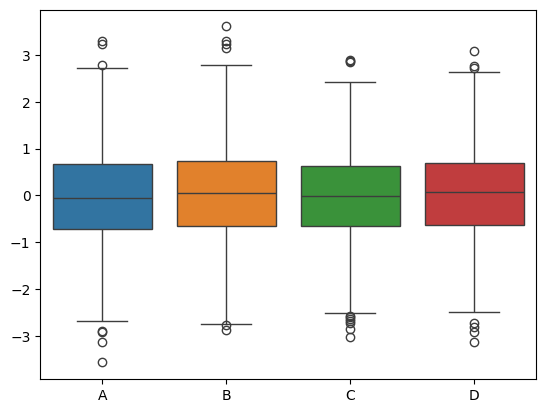

In [88]:
sns.boxplot(data=data_1)
plt.show()

In [89]:
lower_threshold = -1.25
upper_threshold = 1.25
# Máscara para los valores atípicos
outlier_mask = (data_1 < lower_threshold) | (data_1 > upper_threshold)

colors = ['blue', 'green', 'red', 'purple']

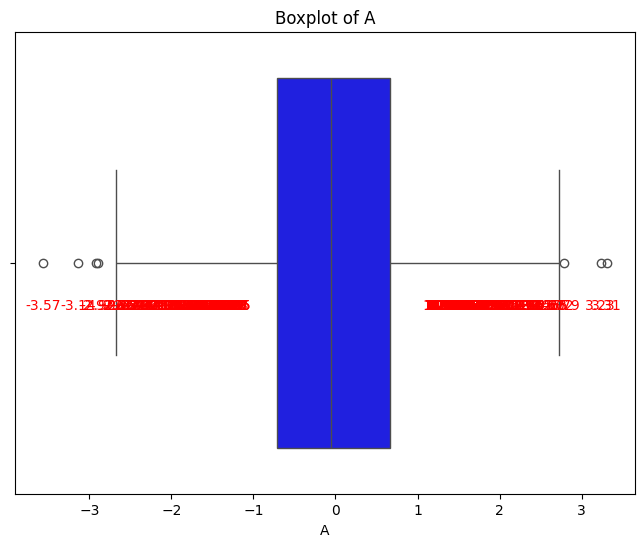

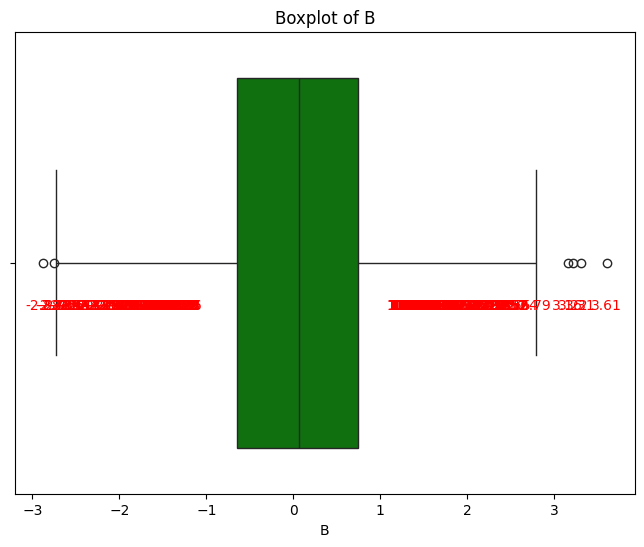

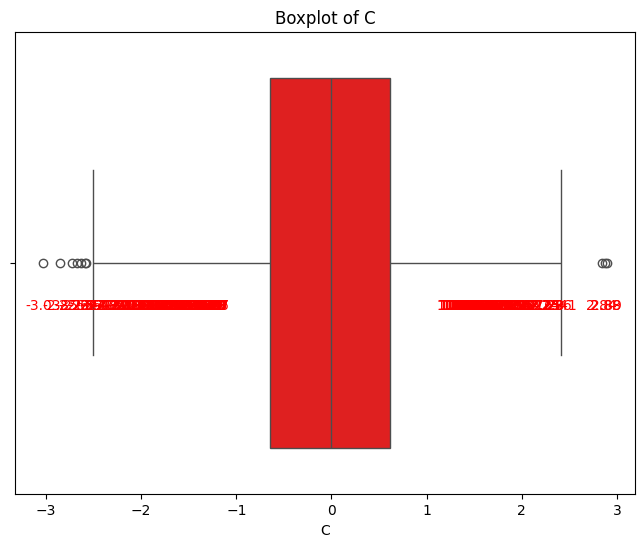

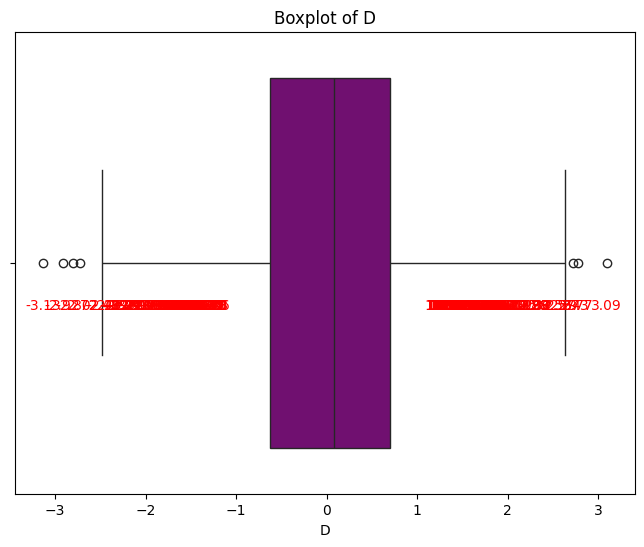

In [90]:
for column, color in zip(data_1.columns, colors):
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x=data_1[column], color=color)
    plt.title(f'Boxplot of {column}')
    
    # Añadir etiquetas para los outliers
    outliers = data_1[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()

--------------------
# Ejercicio 2. Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 4 y menores a cero. Los plots son opcionales.
-------------------------------

In [91]:
data_2 = pd.DataFrame(np.random.uniform(-5, 5, size=(1000, 5)), columns=['A', 'B', 'C', 'D', 'E'])
data_2

,A,B,C,D,E
0,0.002349,-2.255219,2.198049,1.863052,-3.252137
1,4.219423,-1.713489,-0.683941,-0.843095,2.165762
2,-2.626700,4.763065,-2.276460,-3.628812,-0.591095
3,-0.122641,-1.276233,-4.772660,-0.933099,-4.917418
4,-3.130811,3.044258,-2.302918,-4.804224,2.916837
...,...,...,...,...,...
995,4.719609,0.357922,3.177716,-1.984057,4.001309
996,-0.823117,4.484452,-4.555301,4.951751,-0.962602
997,-4.293216,-2.270637,0.222774,3.413368,-1.059342
998,-1.080353,4.227631,-1.268274,-3.718015,3.689482


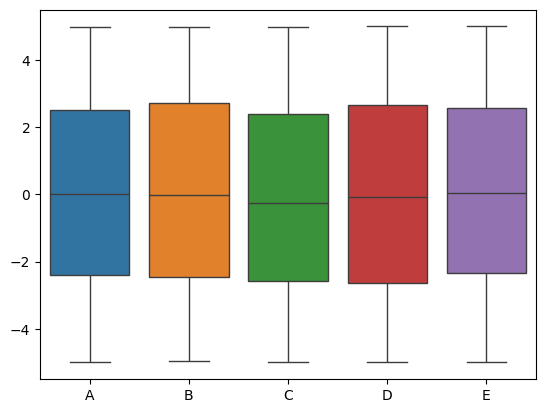

In [92]:
sns.boxplot(data=data_2)
plt.show()

In [93]:
colors = ['blue', 'green', 'red', 'purple']

lower_threshold = 0
upper_threshold = 4

In [94]:
# Máscara para los valores atípicos
outlier_mask = (data_2 < lower_threshold) | (data_2 > upper_threshold)


In [95]:
display(outlier_mask)

,A,B,C,D,E
0,False,True,False,False,True
1,True,True,True,True,False
2,True,True,True,True,True
3,True,True,True,True,True
4,True,False,True,True,False
...,...,...,...,...,...
995,True,False,False,True,True
996,True,True,True,True,True
997,True,True,False,False,True
998,True,True,True,True,False


In [96]:
filtered_data = data_2[~outlier_mask.any(axis=1)]

display(filtered_data.head())

,A,B,C,D,E
30,3.403398,3.712865,2.057506,2.140013,3.001464
96,0.564225,2.512998,3.906050,3.873372,1.767210
104,2.460793,1.113733,2.060282,3.372701,0.238938
579,0.335387,1.851770,2.792217,0.035945,3.101589
642,1.672616,3.680619,0.191838,2.803911,0.380699


------------------------------------

### Permutación y muestreo aleatorio

In [97]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [98]:
sampler = np.random.permutation(5)
sampler

array([3, 2, 0, 1, 4])

In [99]:
df.take(sampler)

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34


In [100]:
df.iloc[sampler]

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34


In [101]:
column_sampler = np.random.permutation(7)
column_sampler

array([0, 5, 4, 2, 6, 1, 3])

In [102]:
df.take(column_sampler, axis="columns")

,0,5,4,2,6,1,3
0,0,5,4,2,6,1,3
1,7,12,11,9,13,8,10
2,14,19,18,16,20,15,17
3,21,26,25,23,27,22,24
4,28,33,32,30,34,29,31


In [103]:
df.sample(n=3) #selecciona aleatoriamente 

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6


In [104]:
choices = pd.Series([5, 7, -1, 6, 4])
choices

0    5
1    7
2   -1
3    6
4    4
dtype: int64

In [105]:
choices.sample(n=10, replace=True) #Muestra con elecciones repetidas

1    7
4    4
0    5
3    6
0    5
4    4
0    5
3    6
3    6
1    7
dtype: int64

-----------------------

### Cálculo de indicadores/variables ficticias (dummy)

In [106]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b", "z"],
                   "data1": range(7)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5
6,z,6


In [107]:
pd.get_dummies(df["key"], dtype=float)

,a,b,c,z
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0


In [108]:
dummies = pd.get_dummies(df["key"], prefix="key", dtype=float)
dummies

,key_a,key_b,key_c,key_z
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0


In [109]:
df_with_dummy = df[["data1"]].join(dummies) # .join lo veremos a detalle mas adelante
df_with_dummy

,data1,key_a,key_b,key_c,key_z
0,0,0.0,1.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0
3,3,0.0,0.0,1.0,0.0
4,4,1.0,0.0,0.0,0.0
5,5,0.0,1.0,0.0,0.0
6,6,0.0,0.0,0.0,1.0


============================================================================

Lectura del dataset movies.dat

In [110]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table('movies.dat', sep="::",
                       header=None, names=mnames, engine="python")

movies[:10]                      

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [111]:
dummies = movies["genres"].str.get_dummies("|")
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [112]:
dummies.iloc[:10, :6] #Seleccionan las filas de la 0 hasta la 9, y las columnas de la 1 hasta la 6. 

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [113]:
movies_windic = movies.join(dummies.add_prefix("Genre_"))

In [114]:
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [115]:
np.random.seed(12345) # para que el ejemplo sea repetible

values = np.random.uniform(size=10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [116]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [117]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,False,False,False,False,True
1,False,True,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,False,True
7,False,False,False,True,False
8,False,False,False,True,False
9,False,False,False,True,False


------------------------
# Ejercicio 3 (Permutaciones, muestreo): Dado el siguiente conjunto de datos:
-----------------------

In [118]:
data = {
    'Tienda': ['A', 'B', 'C', 'D', 'E'],
    'Producto': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'Ventas': [150, 200, 300, 250, 100]
}

1- Crear un dataframe, luego establezca una semilla para la reproducibilidad del ejemplo:

In [119]:
df = pd.DataFrame(data)
df

,Tienda,Producto,Ventas
0,A,P1,150
1,B,P2,200
2,C,P3,300
3,D,P4,250
4,E,P5,100


Establecer una semilla significa fijar un punto de partida específico para el generador de números aleatorios, de modo que cada vez que ejecutes el código con la misma semilla, obtendrás los mismos resultados aleatorios.

In [120]:
np.random.seed(42)

In [121]:
df

,Tienda,Producto,Ventas
0,A,P1,150
1,B,P2,200
2,C,P3,300
3,D,P4,250
4,E,P5,100


2- Crear dos dataframes mas; uno que sea una permutación de columnas y el otro una permutación filas.

In [122]:
# Permutación de las columnas
permuted_columns_df = df.sample(frac=1, axis=1)

# Permutación de las filas
permuted_rows_df = df.sample(frac=1).reset_index(drop=True)

print("Original DataFrame:")
print(df)

print("\nDataFrame con permutación de columnas:")
print(permuted_columns_df)

print("\nDataFrame con permutación de filas:")
print(permuted_rows_df)

Original DataFrame:
  Tienda Producto  Ventas
0      A       P1     150
1      B       P2     200
2      C       P3     300
3      D       P4     250
4      E       P5     100

DataFrame con permutación de columnas:
  Tienda Producto  Ventas
0      A       P1     150
1      B       P2     200
2      C       P3     300
3      D       P4     250
4      E       P5     100

DataFrame con permutación de filas:
  Tienda Producto  Ventas
0      A       P1     150
1      B       P2     200
2      D       P4     250
3      C       P3     300
4      E       P5     100


3- Partiendo de los dos dataframes anteriores extraiga una muestra aletoria de 2 filas.

In [123]:
permuted_columns_df.sample(n=2)

,Tienda,Producto,Ventas
3,D,P4,250
1,B,P2,200


In [124]:
permuted_rows_df.sample(n=2)

,Tienda,Producto,Ventas
1,B,P2,200
0,A,P1,150


----------------------------------

------------------------------
#  Ejercicio 4 (get_dummies). Partiendo del siguiente diccionario: 
------------------------

In [125]:
data = {
    'Nombre': ['Ana', 'Luis', 'María', 'Pedro', 'Laura', 'Carlos', 'Marta', 'Jorge'],
    'Edad': [23, 45, 31, 34, 28, 40, 36, 50],
    'Departamento': ['Ventas', 'IT', 'IT', 'Ventas', 'Marketing', 'Ventas', 'Marketing', 'IT'],
    'Salario': [50000, 60000, 55000, 52000, 58000, 51000, 60000, 62000]
}

1- Convertir el diccionario a un pandas dataframe

In [126]:
df = pd.DataFrame(data)
df

,Nombre,Edad,Departamento,Salario
0,Ana,23,Ventas,50000
1,Luis,45,IT,60000
2,María,31,IT,55000
3,Pedro,34,Ventas,52000
4,Laura,28,Marketing,58000
5,Carlos,40,Ventas,51000
6,Marta,36,Marketing,60000
7,Jorge,50,IT,62000


2- Convertir la columna departamento en variables dummy

In [127]:
departamento_dummy = pd.get_dummies(df["Departamento"], dtype=float)
print("\nDataFrame con variables dummy para 'Departamento':")
display(departamento_dummy)


DataFrame con variables dummy para 'Departamento':


,IT,Marketing,Ventas
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0


3- Definir los límites (los intervalos) y etiquetas para los grupos de edad

In [128]:
df['Edad'].describe()

count     8.00000
mean     35.87500
std       8.90325
min      23.00000
25%      30.25000
50%      35.00000
75%      41.25000
max      50.00000
Name: Edad, dtype: float64

In [129]:
bins = [20, 30, 40, 50]
labels = ['Junior', 'Senior', 'Chief']


4- Crear la nueva columna con nombre: Grupo_Edad utilizando .cut()

In [130]:
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)

df

,Nombre,Edad,Departamento,Salario,Grupo_Edad
0,Ana,23,Ventas,50000,Junior
1,Luis,45,IT,60000,Chief
2,María,31,IT,55000,Senior
3,Pedro,34,Ventas,52000,Senior
4,Laura,28,Marketing,58000,Junior
5,Carlos,40,Ventas,51000,Senior
6,Marta,36,Marketing,60000,Senior
7,Jorge,50,IT,62000,Chief


-------------------------------------------------------

## 2.3 Extension de tipos de datos 

In [131]:
s = pd.Series([1, 2, 3, 400, None])
s

0      1.0
1      2.0
2      3.0
3    400.0
4      NaN
dtype: float64

In [132]:
s.dtype

dtype('float64')

In [133]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [134]:
s.isna()

0    False
1    False
2    False
3     True
dtype: bool

In [135]:
s.dtype

Int64Dtype()

In [136]:
s[3]

<NA>

In [137]:
s[3] is pd.NA

True

In [138]:
s = pd.Series([1, 2, 3, None], dtype="Int64")
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [139]:
s = pd.Series(['one', 'two', None, 'three'], dtype=pd.StringDtype())
s

0      one
1      two
2     <NA>
3    three
dtype: string

======================================================================================

In [140]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})

df


,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [141]:
df["A"] = df["A"].astype("Int64")

In [142]:
df["B"] = df["B"].astype("string")

In [143]:
df["C"] = df["C"].astype("boolean")

In [144]:
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


## 2.4 Manipulación de cadenas (string)

In [145]:
val = "a,b,  separacion, es"
val.split(",")

['a', 'b', '  separacion', ' es']

In [146]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'separacion', 'es']

In [147]:
first, second, third, four = pieces
first + "::" + second + "::" + third + "::" + four

'a::b::separacion::es'

In [148]:
"::".join(pieces)

'a::b::separacion::es'

In [149]:
"separacion" in val

True

In [150]:
val.index(",")

1

In [151]:
val.find(":")

-1

In [152]:
val.count(",")

3

In [153]:
val.replace(",", "::")

'a::b::  separacion:: es'

In [154]:
val.replace(",", "")

'ab  separacion es'

-----------------------------------------------------------

### Expresiones Regulares

La expresión regular que describe uno o más caracteres de espacio en blanco es `\s+`:

In [155]:
import re

text = "foo  bar\t baz  \tqux"
text

'foo  bar\t baz  \tqux'

In [156]:
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

In [157]:
regex = re.compile(r"\s+")

regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [158]:
regex.findall(text) #lista de todos los patrones que coincidan con la expresión regular

['  ', '\t ', '  \t']

In [159]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""

pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

# re.IGNORECASE hace que la expresión regular no distinga 
# entre mayúsculas y minúsculas. 
regex = re.compile(pattern, flags=re.IGNORECASE)



In [160]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [161]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [162]:
text[m.start():m.end()]

'dave@google.com'

In [163]:
print(regex.match(text))

None


In [164]:
print(regex.sub("REDACTED", text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


In [165]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

regex = re.compile(pattern, flags=re.IGNORECASE)

In [166]:
m = regex.match("wesm@bright.net")

m.groups()

('wesm', 'bright', 'net')

In [167]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [168]:
print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com


-------------------------------

### Funciones de cadena en pandas

In [169]:
data = {"Dave": "dave@google.com",
        "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com",
        "Wes": np.nan}

data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [170]:
data.isna()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [171]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [172]:
data_as_string_ext = data.astype('string')
data_as_string_ext

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [173]:
data_as_string_ext.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes       <NA>
dtype: boolean

In [174]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [175]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]
# La línea .str[0] se utiliza para obtener la primera tupla
# de la lista, que contiene los valores encontrados para el 
# primer grupo de captura en la expresión regular.
matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [176]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

In [177]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [178]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


----------------
# Ejercicio 5. Expresiones regulares.
-----------------------

In [179]:
data = {
    'Name': [
        'Dave', 'Steve', 'Rob', 'Ryan', 'Alice', 'Eve', 'John', 'Jane', 'Peter', 'Mary', 'Tom', 'Lucy', 
        'Mike', 'Chris', 'Emma', 'Olivia', 'Sophia', 'Liam', 'Noah', 'Mason', 'Ava', 'Mia', 'James', 'Benjamin'
    ],
    'Email': [
        'dave@google.com', 'steve@gmail.com', 'rob@yahoo.com', 'ryan@gmail.com', 
        'alice@hotmail.com', 'eve@google.com', 'john@outlook.com', 'jane@gmail.com',
        'peter@amazon.com', 'mary@google.com', 'tom@apple.com', 'lucy@yahoo.com',
        'mike@facebook.com', 'chris@netflix.com', 'emma@google.com', 'olivia@gmail.com',
        'sophia@amazon.com', 'liam@apple.com', 'noah@google.com', 'mason@yahoo.com',
        'ava@outlook.com', 'mia@gmail.com', 'james@hotmail.com', 'benjamin@google.com'
    ]
}

### Una vez pasado el diccionario a un DataFrame que contiene nombres y direcciones de correo electrónico, realiza las siguientes tareas:

- Extrae los dominios de los correos electrónicos.
- Cuenta la frecuencia de cada dominio.
- Crea un nuevo DataFrame que contenga cada dominio como columna y el número de veces que se repiten dichos dominios en las filas.
#### Resolver de las dos formas: Usando expresiones regulares y usando los métodos propios de pandas.

In [180]:
df = pd.DataFrame(data)
df

,Name,Email
0,Dave,dave@google.com
1,Steve,steve@gmail.com
2,Rob,rob@yahoo.com
3,Ryan,ryan@gmail.com
4,Alice,alice@hotmail.com
5,Eve,eve@google.com
6,John,john@outlook.com
7,Jane,jane@gmail.com
8,Peter,peter@amazon.com
9,Mary,mary@google.com


## Solución con expresiones regulares

In [181]:
domains = df['Email'].apply(lambda x: re.search('@(.*)', x).group(1))

In [182]:
domain_counts = domains.value_counts()

In [183]:
domain_df = pd.DataFrame(domain_counts)
domain_df

,count
Email,
google.com,6
gmail.com,5
yahoo.com,3
hotmail.com,2
outlook.com,2
amazon.com,2
apple.com,2
facebook.com,1
netflix.com,1


## Solución con los métodos propios de Pandas

In [184]:
df

,Name,Email
0,Dave,dave@google.com
1,Steve,steve@gmail.com
2,Rob,rob@yahoo.com
3,Ryan,ryan@gmail.com
4,Alice,alice@hotmail.com
5,Eve,eve@google.com
6,John,john@outlook.com
7,Jane,jane@gmail.com
8,Peter,peter@amazon.com
9,Mary,mary@google.com


In [185]:
domains = df['Email'].str.split('@').str[1]

In [186]:
domain_counts = domains.value_counts()

In [187]:
domain_df = pd.DataFrame(domain_counts)
domain_df

,count
Email,
google.com,6
gmail.com,5
yahoo.com,3
hotmail.com,2
outlook.com,2
amazon.com,2
apple.com,2
facebook.com,1
netflix.com,1


In [188]:
# Separamos la columna Email en tres partes
df[['Username', 'Domain', 'TLD']] = df['Email'].apply(lambda x: pd.Series([x.split('@')[0], *x.split('@')[1].split('.')])).values.tolist()

print(df)

        Name                Email  Username    Domain  TLD
0       Dave      dave@google.com      dave    google  com
1      Steve      steve@gmail.com     steve     gmail  com
2        Rob        rob@yahoo.com       rob     yahoo  com
3       Ryan       ryan@gmail.com      ryan     gmail  com
4      Alice    alice@hotmail.com     alice   hotmail  com
5        Eve       eve@google.com       eve    google  com
6       John     john@outlook.com      john   outlook  com
7       Jane       jane@gmail.com      jane     gmail  com
8      Peter     peter@amazon.com     peter    amazon  com
9       Mary      mary@google.com      mary    google  com
10       Tom        tom@apple.com       tom     apple  com
11      Lucy       lucy@yahoo.com      lucy     yahoo  com
12      Mike    mike@facebook.com      mike  facebook  com
13     Chris    chris@netflix.com     chris   netflix  com
14      Emma      emma@google.com      emma    google  com
15    Olivia     olivia@gmail.com    olivia     gmail  c

In [189]:
print(df['Domain'].value_counts())

Domain
google      6
gmail       5
yahoo       3
hotmail     2
outlook     2
amazon      2
apple       2
facebook    1
netflix     1
Name: count, dtype: int64


---------------------------------------------------------------------
-------------------------

## 2.5 Datos Categóricos

In [190]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values               

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [191]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [192]:
pd.value_counts(values)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1388\3297668723.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(values)


apple     6
orange    2
Name: count, dtype: int64

In [193]:
values = pd.Series([0, 1, 0, 0] * 2)
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [194]:
dim = pd.Series(['apple', 'orange'])
dim

0     apple
1    orange
dtype: object

In [195]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [196]:
# Series de índices codificados
encoded_labels = pd.Series([0, 1, 2, 1, 0, 2, 2, 0])

# Series de etiquetas originales
pet_labels = pd.Series(['cat', 'dog', 'bird'])

# Reconstruir las etiquetas originales
decoded_labels = pet_labels.take(encoded_labels)

decoded_labels

0     cat
1     dog
2    bird
1     dog
0     cat
2    bird
2    bird
0     cat
dtype: object

---------------------------------------------------------------

### Extension de tipos de datos categóricos en Pandas

In [197]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [198]:
N = len(fruits)
N

8

In [199]:
rng = np.random.default_rng(seed=12345)

In [200]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, size=N),
                   'weight': rng.uniform(0, 4, size=N)},
                    columns=['basket_id', 'fruit', 'count', 'weight'])

df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [201]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [202]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [203]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [204]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [205]:
dict(enumerate(c.categories))


{0: 'apple', 1: 'orange'}

In [206]:
df['fruit'] = df['fruit'].astype('category')

In [207]:
df["fruit"]

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [208]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [209]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]

In [210]:
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [211]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [212]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

-------------------------------------------------------

### Cálculos con datos categorías

In [213]:
rng = np.random.default_rng(seed=12345)

draws = rng.standard_normal(1000)

draws[:5]

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331])

In [214]:
draws.shape

(1000,)

In [215]:
bins = pd.qcut(draws, 4)
bins

[(-3.121, -0.675], (0.687, 3.211], (-3.121, -0.675], (-0.675, 0.0134], (-0.675, 0.0134], ..., (0.0134, 0.687], (0.0134, 0.687], (-0.675, 0.0134], (0.0134, 0.687], (-0.675, 0.0134]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.121, -0.675] < (-0.675, 0.0134] < (0.0134, 0.687] < (0.687, 3.211]]

In [216]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

['Q1', 'Q4', 'Q1', 'Q2', 'Q2', ..., 'Q3', 'Q3', 'Q2', 'Q3', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [217]:
bins.codes[:10]

array([0, 3, 0, 1, 1, 0, 0, 2, 2, 0], dtype=int8)

In [218]:
bins = pd.Series(bins, name='quartile')

In [219]:
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())
# el método agg calcula las estadísticas resumidas para cada grupo, 
# en este caso, el número de elementos en cada grupo, 
# el valor mínimo y el valor máximo.
results

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1388\2441121649.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(bins)


,quartile,count,min,max
0,Q1,250,-3.119609,-0.678494
1,Q2,250,-0.673305,0.008009
2,Q3,250,0.018753,0.686183
3,Q4,250,0.688282,3.211418


In [220]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

----------------------------------------------------------------------------

### Mejor rendimiento con categóricos

In [221]:
N = 10_000_000

In [222]:
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))
labels

0          foo
1          bar
2          baz
3          qux
4          foo
          ... 
9999995    qux
9999996    foo
9999997    bar
9999998    baz
9999999    qux
Length: 10000000, dtype: object

In [223]:
categories = labels.astype('category')

In [224]:
labels.memory_usage(deep=True)

600000132

In [225]:
categories.memory_usage(deep=True)

10000544

In [226]:
%time _ = labels.astype('category')

CPU times: total: 406 ms
Wall time: 413 ms


Las operaciones `GroupBy` pueden ser significativamente más rápidas con categóricas porque los algoritmos subyacentes utilizan arrays de códigos basada en enteros en lugar de un array  de cadenas. Aquí comparamos el rendimiento de value_counts(), que utiliza internamente la maquinaria `GroupBy`:

In [227]:
%timeit labels.value_counts()

347 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [228]:
%timeit categories.value_counts()

44.2 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


###  Métodos categóricos

Las series que contienen datos categóricos disponen de varios métodos especiales similares a los métodos de cadena especializados de Series.str. Esto también proporciona un acceso conveniente a las categorías y códigos. Considere la Serie:

In [229]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
    
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

El atributo especial de acceso `cat` proporciona acceso a métodos categóricos:

In [230]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [231]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

Supongamos que sabemos que el conjunto real de categorías para estos datos se extiende más allá de los cuatro valores observados en los datos. Podemos utilizar el método `set_categories` para cambiarlas:

In [232]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

cat_s2 = cat_s.cat.set_categories(actual_categories)

cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

Aunque parezca que los datos no cambian, las nuevas categorías se reflejarán en las operaciones que las utilicen. Por ejemplo, value_counts respeta las categorías, si están presentes:



In [233]:
cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [234]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

En grandes conjuntos de datos, las categorías se utilizan a menudo como una herramienta conveniente para ahorrar memoria y mejorar el rendimiento. Después de filtrar un gran DataFrame o Series, muchas de las categorías pueden no aparecer en los datos. Para ayudar con esto, podemos utilizar el método remove_unused_categories para recortar las categorías no observadas:

In [235]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [236]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

### Creación de variables ficticias para la modelización

Cuando se utilizan herramientas estadísticas o de aprendizaje automático, a menudo se transforman los datos categóricos en variables ficticias, lo que también se conoce como codificación de una sola vez (one-hot encoding). Esto implica crear un DataFrame con una columna para cada categoría distinta; estas columnas contienen 1s para ocurrencias de una categoría dada y 0 en caso contrario.

Consideremos el ejemplo anterior:

In [237]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

Como se ha mencionado anteriormente , la función pandas.get_dummies convierte estos datos categóricos unidimensionales en un DataFrame que contiene la variable ficticia:

In [238]:
pd.get_dummies(cat_s, dtype=float)

,a,b,c,d
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0


---------------------------
# Artículo:
https://tajamar365.sharepoint.com/:b:/s/3153-DataScience/EVrm0eGaswBDhRwUVvIMf6ABLS2u-rAWNqJL0GQxnL0jRw
 
 -----------

In [239]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [240]:
import pandas as pd
import os
import opendatasets as od

In [241]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset'
# Using opendatasets let's download the data sets
od.download(dataset)

Skipping, found downloaded files in ".\usa-cers-dataset" (use force=True to force download)


In [242]:
df = pd.read_csv('usa-cers-dataset/USA_cars_datasets.csv')
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [243]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [244]:
df = df.drop('Unnamed: 0', axis = 1)


In [245]:
df.head(5)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [247]:
df['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'no_color', 'gold', 'charcoal', 'turquoise', 'beige',
       'green', 'dark blue', 'maroon', 'phantom black', 'yellow',
       'color:', 'light blue', 'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [248]:
df['color'].nunique()

49

La columna 'color', tiene 49 valores diferentes, lo que significa que tendremos 49 columnas despues de aplicar `get_dummies`. 

In [249]:
color_dummies = pd.get_dummies(df['color']).astype(int)

color_dummies.head(4)

,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,cayenne red,charcoal,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
color_dummies.dtypes

beige                                      int32
billet silver metallic clearcoat           int32
black                                      int32
black clearcoat                            int32
blue                                       int32
bright white clearcoat                     int32
brown                                      int32
burgundy                                   int32
cayenne red                                int32
charcoal                                   int32
color:                                     int32
competition orange                         int32
dark blue                                  int32
glacier white                              int32
gold                                       int32
gray                                       int32
green                                      int32
guard                                      int32
ingot silver                               int32
ingot silver metallic                      int32
jazz blue pearlcoat 

In [251]:
df_join = (df.drop(['color'], axis = 1)).join(color_dummies)
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   price                                    2499 non-null   int64  
 1   brand                                    2499 non-null   object 
 2   model                                    2499 non-null   object 
 3   year                                     2499 non-null   int64  
 4   title_status                             2499 non-null   object 
 5   mileage                                  2499 non-null   float64
 6   vin                                      2499 non-null   object 
 7   lot                                      2499 non-null   int64  
 8   state                                    2499 non-null   object 
 9   country                                  2499 non-null   object 
 10  condition                                2499 no

In [252]:
pd.get_dummies(df['color']).astype(int)

,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,cayenne red,charcoal,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2497,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
pd.get_dummies(df['color'], drop_first = True)
#Aqui tenemos 48 columnas. 

,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,cayenne red,charcoal,color:,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2495,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2497,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Eliminé la primera columna pero al realizar un loc aparece la columna eliminada 'Beige'. 

In [254]:
pd.get_dummies(df['color']).loc[[133]]

,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,cayenne red,charcoal,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
133,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [255]:
pd.get_dummies(df['color'], drop_first=True).loc[[133]]

,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,cayenne red,charcoal,color:,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
133,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


MAs columnas significa menos performance y mas tiempo de entrenamiento.  Imaginameos que tenenmos 20 columnas que no son numéricas. y si usamos el 'drop_first', tendremos 20 columnas menos. Es útil usar el 'drop_first' para el comportamiento del modelo. 

In [256]:
pd.get_dummies(df['color'], drop_first = True, prefix = 'BC')


,BC_billet silver metallic clearcoat,BC_black,BC_black clearcoat,BC_blue,BC_bright white clearcoat,BC_brown,BC_burgundy,BC_cayenne red,BC_charcoal,BC_color:,...,BC_silver,BC_super black,BC_tan,BC_toreador red,BC_triple yellow tri-coat,BC_turquoise,BC_tuxedo black metallic,BC_white,BC_white platinum tri-coat metallic,BC_yellow
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2495,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2497,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [257]:
pd.get_dummies(df, drop_first = True)



,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,6300,2008,274117.0,159348797,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2899,2011,190552.0,166951262,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,5350,2018,39590.0,167655728,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25000,2014,64146.0,167753855,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,27700,2018,6654.0,167763266,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609.0,167722715,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2495,9200,2018,34553.0,167762225,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2496,9200,2018,31594.0,167762226,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2497,9200,2018,32557.0,167762227,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [258]:
pd.get_dummies(df, columns = ['price', 'year', 'lot', 'brand'], drop_first = True)

,model,title_status,mileage,color,vin,state,country,condition,price_25,price_50,...,brand_land,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram,brand_toyota
0,cruiser,clean vehicle,274117.0,black,jtezu11f88k007763,new jersey,usa,10 days left,False,False,...,False,False,False,False,False,False,False,False,False,True
1,se,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,tennessee,usa,6 days left,False,False,...,False,False,False,False,False,False,False,False,False,False
2,mpv,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,georgia,usa,2 days left,False,False,...,False,False,False,False,False,False,False,False,False,False
3,door,clean vehicle,64146.0,blue,1ftfw1et4efc23745,virginia,usa,22 hours left,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1500,clean vehicle,6654.0,red,3gcpcrec2jg473991,florida,usa,22 hours left,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,versa,clean vehicle,23609.0,red,3n1cn7ap9kl880319,california,usa,1 days left,False,False,...,False,False,False,False,False,False,True,False,False,False
2495,versa,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,florida,usa,21 hours left,False,False,...,False,False,False,False,False,False,True,False,False,False
2496,versa,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,florida,usa,21 hours left,False,False,...,False,False,False,False,False,False,True,False,False,False
2497,versa,clean vehicle,32557.0,black,3n1cn7ap3jl883263,florida,usa,2 days left,False,False,...,False,False,False,False,False,False,True,False,False,False


> Para String

str.get_dummies = se aplica a series y es una version de string. 

In [259]:
df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [260]:
df['condition'].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

In [261]:
df['condition'].nunique()

47

In [262]:
df['condition'].str.get_dummies(',')

,1 days left,1 hours left,1 minutes,10 days left,11 days left,12 days left,12 hours left,13 days left,14 hours left,15 days left,...,5 hours left,53 minutes,6 days left,6 hours left,7 days left,7 hours left,8 days left,9 days left,9 minutes,Listing Expired
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
df_extra = df['condition'].str.get_dummies(',')

In [264]:
dfs_dummy = (df.drop(['condition'], axis = 1)).join(df_extra)

In [265]:
dfs_dummy.shape

(2499, 58)

In [266]:
dfs_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2499 non-null   int64  
 1   brand            2499 non-null   object 
 2   model            2499 non-null   object 
 3   year             2499 non-null   int64  
 4   title_status     2499 non-null   object 
 5   mileage          2499 non-null   float64
 6   color            2499 non-null   object 
 7   vin              2499 non-null   object 
 8   lot              2499 non-null   int64  
 9   state            2499 non-null   object 
 10  country          2499 non-null   object 
 11  1 days left      2499 non-null   int64  
 12  1 hours left     2499 non-null   int64  
 13  1 minutes        2499 non-null   int64  
 14  10 days left     2499 non-null   int64  
 15  11 days left     2499 non-null   int64  
 16  12 days left     2499 non-null   int64  
 17  12 hours left 

---------------------------------------
# 	Investigar las diferencias entre get_dummies y one hot encoding, añade tu resumen al mismo notebook del artículo anterior.
---------------------

> pd.get_dummies de pandas

pd.get_dummies es una función de pandas que convierte variables categóricas en una matriz de indicadores (dummy variables). Es fácil de usar y directamente convierte las columnas categóricas de un DataFrame en columnas binarias (0 y 1

In [273]:
data = {
    'color': ['rojo', 'azul', 'verde', 'rojo', 'azul'],  # Nominal
    'tamaño': ['pequeño', 'grande', 'mediano', 'pequeño', 'grande'],  # Ordinal
    'precio': [100, 150, 200, 130, 170]
}

df = pd.DataFrame(data)

# Variables nominales y ordinales
nominales = ['color'] # no tienen orden 
ordinales = ['tamaño'] # tienen orden 

df

,color,tamaño,precio
0,rojo,pequeño,100
1,azul,grande,150
2,verde,mediano,200
3,rojo,pequeño,130
4,azul,grande,170


In [268]:
dummies = pd.get_dummies(df[nominales])

# Concatenar el DataFrame original con las dummy variables
df_dummies = pd.concat([df, dummies], axis=1).drop(nominales, axis=1)

print("DataFrame con pd.get_dummies (variables nominales):")
display(df_dummies)

DataFrame con pd.get_dummies (variables nominales):


,tamaño,precio,color_azul,color_rojo,color_verde
0,pequeño,100,False,True,False
1,grande,150,True,False,False
2,mediano,200,False,False,True
3,pequeño,130,False,True,False
4,grande,170,True,False,False


> Usando OneHotEncoder y OrdinalEncoder'

OneHotEncoder puede usarse tanto para variables nominales como ordinales, aunque OrdinalEncoder es más adecuado para las variables ordinales porque conserva el orden intrínseco.

In [269]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [270]:
# Usar OrdinalEncoder para variables ordinales
ordinal_encoder = OrdinalEncoder(categories=[['pequeño', 'mediano', 'grande']])
df[ordinales] = ordinal_encoder.fit_transform(df[ordinales])

print("DataFrame con OrdinalEncoder (variables ordinales):")
display(df)

# Usar OneHotEncoder para variables nominales
onehot_encoder = OneHotEncoder(sparse_output=False)  
encoded_nominales = onehot_encoder.fit_transform(df[nominales])

# Convertir el array numpy resultante a un DataFrame de pandas
encoded_nominales_df = pd.DataFrame(encoded_nominales, columns=onehot_encoder.get_feature_names_out(nominales))

# Concatenar el DataFrame original con las variables ordinales y nominales codificadas
df_onehot = pd.concat([df.drop(nominales, axis=1), encoded_nominales_df], axis=1)

print("\nDataFrame con OneHotEncoder (variables nominales) y OrdinalEncoder (variables ordinales):")
display(df_onehot)


DataFrame con OrdinalEncoder (variables ordinales):


,color,tamaño,precio
0,rojo,0.0,100
1,azul,2.0,150
2,verde,1.0,200
3,rojo,0.0,130
4,azul,2.0,170



DataFrame con OneHotEncoder (variables nominales) y OrdinalEncoder (variables ordinales):


,tamaño,precio,color_azul,color_rojo,color_verde
0,0.0,100,0.0,1.0,0.0
1,2.0,150,1.0,0.0,0.0
2,1.0,200,0.0,0.0,1.0
3,0.0,130,0.0,1.0,0.0
4,2.0,170,1.0,0.0,0.0
